<a href="https://colab.research.google.com/github/armitakar/GGS366_Spatial_Computing/blob/main/Lectures/7_Data_visualizations_and_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matplotlib** is a widely used Python library for creating graphs, charts, and maps. A Matplotlib figure consists of multiple components:

- **Figure**: The overall canvas or area where all plot elements are placed.
- **Axes (or Subplots)**: The regions within a figure where we plot the data. A figure may contain one or more Axes, and each axes can have its own title, legend, grid, and x- and y-axis etc.
- **Axis:** The x- and y-axis that define the coordinate system for the plot. Each axis can have major and minor tick labels, which can be formatted as needed.
- **Markers**: Individual data points represented in the plot.
- **Lines**: Lines connecting markers to visualize trends in data.

In addition to the broad range of functions Matplotlib provides for data visualization, we frequently use its **pyplot module** that offers a collection of functions to quickly create and modify different aspects of a graph, such as setting axis limits, adding titles, legends, and gridlines. However, this approach may not provide the full flexibility we need later when creating maps with Matplotlib.

In this lecture, we will use the **object-oriented (OO) style where we explicitly create the figures and axes**. In this approach:
- We first use **pyplot.subplots()** function to define the figure (size and layout) and its axes.  
- We then use **axes.plot()** to plot the data onto the defined axes.

  <img src="https://matplotlib.org/stable/_images/anatomy.png" alt="Image" width="400" height="400">

More more information:
- https://matplotlib.org/stable/users/explain/quick_start.html#quick-start
- https://matplotlib.org/stable/users/explain/axes/axes_intro.html
- https://matplotlib.org/stable/tutorials/pyplot.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


# Graphs and Charts

In [396]:
# we will start with loading the module
import matplotlib.pyplot as plt

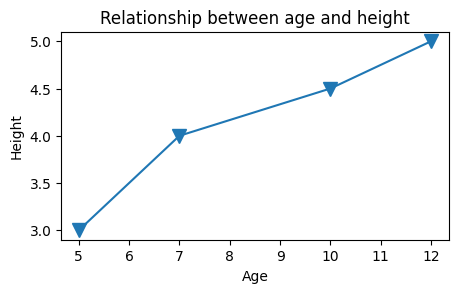

In [397]:
# Say we have two lists x and y containing age and height information for four individuals
# we want to create a line graph showing the relationship between age and height
x = [5, 7, 10, 12] # age
y = [3, 4, 4.5, 5] # height

# First, we will create a figure containing a single axes and a fixed figure size
# By default, the figure sizes are set in inches, we can convert them to other units if needed
fig, ax = plt.subplots(figsize=(5, 2.7))

# Next, we plot the data within axes
# we also want to show the data points with markers
# Here're some more details on markers: https://matplotlib.org/stable/api/markers_api.html
ax.plot(x, y, marker="v", markersize=10)

# We can update the axis labels and axes title
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_title('Relationship between age and height')

# calling this function is optional, depending on your code organization
plt.show()

Now let's make some graphs with real datasets. We will need to load the *Pandas* and *GeoPandas* libraries first.

In [398]:
# loading Pandas and GeoPandas libraries
import pandas as pd
import geopandas as gpd

### Data loading and prepocessing

We use the Virginia crash data of 2016 for this lecture. We retrieve the data from here: https://www.virginiaroads.org/datasets/VDOT::crashdata-basic-1/explore

In [399]:
# loading crash data
crash = gpd.read_file("https://services.arcgis.com/p5v98VHDX9Atv3l7/arcgis/rest/services/CrashData_test/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [400]:
# the dataset provides us with following information
crash.columns

Index(['OBJECTID', 'DOCUMENT_NBR', 'CRASH_YEAR', 'CRASH_DT',
       'CRASH_MILITARY_TM', 'CRASH_SEVERITY', 'K_PEOPLE', 'A_PEOPLE',
       'B_PEOPLE', 'C_PEOPLE', 'PERSONS_INJURED', 'PEDESTRIANS_KILLED',
       'PEDESTRIANS_INJURED', 'VEH_COUNT', 'COLLISION_TYPE',
       'WEATHER_CONDITION', 'LIGHT_CONDITION', 'ROADWAY_SURFACE_COND',
       'RELATION_TO_ROADWAY', 'ROADWAY_ALIGNMENT', 'ROADWAY_SURFACE_TYPE',
       'ROADWAY_DEFECT', 'ROADWAY_DESCRIPTION', 'INTERSECTION_TYPE',
       'TRAFFIC_CONTROL_TYPE', 'TRFC_CTRL_STATUS_TYPE', 'WORK_ZONE_RELATED',
       'WORK_ZONE_LOCATION', 'WORK_ZONE_TYPE', 'SCHOOL_ZONE',
       'FIRST_HARMFUL_EVENT', 'FIRST_HARMFUL_EVENT_LOC', 'ALCOHOL_NOTALCOHOL',
       'ANIMAL', 'BELTED_UNBELTED', 'BIKE_NONBIKE', 'DISTRACTED_NOTDISTRACTED',
       'DROWSY_NOTDROWSY', 'DRUG_NODRUG', 'GR_NOGR', 'HITRUN_NOT_HITRUN',
       'LGTRUCK_NONLGTRUCK', 'MOTOR_NONMOTOR', 'PED_NONPED', 'SPEED_NOTSPEED',
       'SPEED_DIFF_MAX', 'RD_TYPE', 'INTERSECTION_ANALYSIS',
       'S

For this lecture, we will mainly use the ***CRASH_DT*** (crash date and time) and ***CRASH_SEVERITY*** (crash severity levels) columns. However, before we proceed, these columns need some pre-processing.

You will see that the *CRASH_DT* column is loaded as numerical timestamps. We can convert them to **DateTime objects** using *Pandas* time series functionalities. See the details here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html


In [401]:
# crash date and times (CRASH_DT column) are in numerical timestamps
crash.CRASH_DT

,CRASH_DT
0,1481000400000
1,1453784400000
2,1455339600000
3,1458964800000
4,1468814400000
...,...
1995,1470110400000
1996,1480741200000
1997,1481691600000
1998,1482123600000


In [402]:
# first we use the to_datetime() function to convert the numeric timestamps to datetime objects
crash['CRASH_DT1'] = pd.to_datetime(crash['CRASH_DT'], utc = True, unit='ms')
# next we adjust the timezones for each datetime object using tz_convert() function
crash['CRASH_DT1'] = [crash.loc[i, 'CRASH_DT1'].tz_convert('US/Eastern') for i in range(len(crash))]

Also, the *CRASH_SEVERITY* column is coded, limiting its interpretability. We can replace the codes using metadata obtained from the data source.   

In [403]:
# check the unique values in crash severity column
crash.CRASH_SEVERITY.unique()

array(['O', 'B', 'C', 'A', 'K'], dtype=object)

In [404]:
# replace the codes with actual categories in Metadata
crash['CRASH_SEVERITY'] = crash['CRASH_SEVERITY'].replace({'K': '1. Fatal Injury',
                                                           'A': '2. Severe Injury',
                                                           'B': '3. Visible Injury',
                                                           'C': '4. Nonvisible Injury',
                                                           'O': '5. Property Damage Only'})

You can create many types of plots with Matplotlib. In this lecture, we will show examples of creating histograms and boxplots.

### Histograms

A **histogram** visualizes distribution of quantitative data. We create histograms by dividing the entire range of values into intervals (or "bins") and then counting how many values fall into each interval.

In this example, we want to illustrate **the distribution of crash across the entire study period (2016)**. We will use pyplot's **hist()** function to create histogram: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Text(0.5, 1.0, 'Crash frequencies in Virginia in 2016')

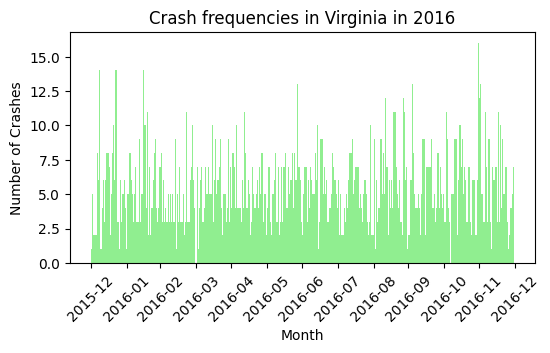

In [405]:
# Creating a figure containing a single Axes and a fixed figure size
fig, ax = plt.subplots(figsize=(6, 3))
# creating the histogram
plt.hist(crash['CRASH_DT1'], bins=365, color='lightgreen')

# It is unrealistic to show all the dates in the x-axis tick labels.
# Instead, we can set the major x-axis ticks to be at the start of each month
# To extract the months from DateTime objects, we use the mdates.MonthLocator() function
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Adding labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Crashes')
ax.set_title('Crash frequencies in Virginia in 2016')

Now, what if, we want to examine the histograms (crash frequencies) by crash severity levels.

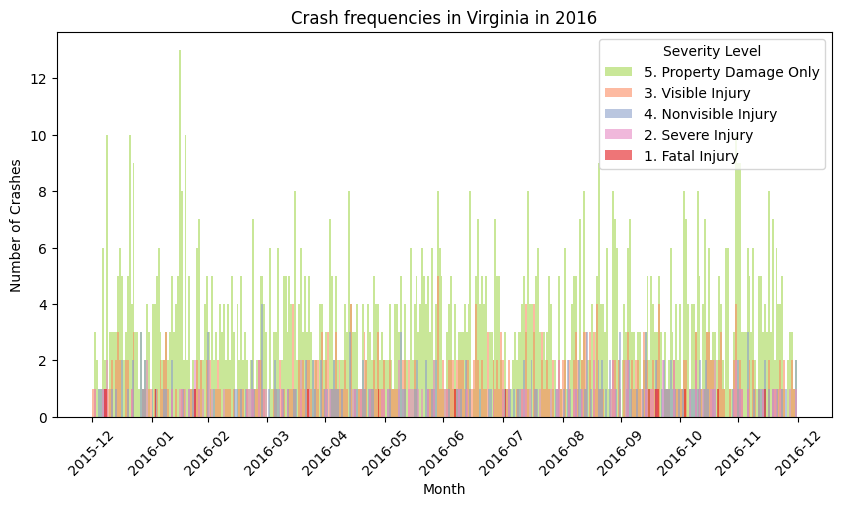

In [406]:
# Creating a figure containing a single axes and a fixed figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Define color dictionary for each severity levels
# Here we use hex color codes retrieved from color brewer: https://colorbrewer2.org/#type=qualitative&scheme=Set2&n=5
colors = {'1. Fatal Injury': '#e41a1c',
          '2. Severe Injury': '#e78ac3',
          '3. Visible Injury': '#fc8d62',
          '4. Nonvisible Injury': '#8da0cb',
          '5. Property Damage Only': '#a6d854'}

# list the crash severity levels
severity_levels = list(crash.CRASH_SEVERITY.unique())

# for each severity_levels, we subset the data and add the histogram to the axes
for i in severity_levels:
    # Filter crashes by severity
    subset = crash[crash['CRASH_SEVERITY'] == i]
    ax.hist(subset['CRASH_DT1'],
            bins=365,
            # assigning colors from the color dictionary
            color=colors[i],
            # label severity levels in the legend
            label=i,
            # adding transperancy to the histogram bar to make them visible over other bars
            alpha=0.6)


# Setting major x-axis ticks to be at the start of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Adding labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Crashes')
ax.set_title('Crash frequencies in Virginia in 2016')

# Adding legend
ax.legend(title="Severity Level", loc='upper right')

# Show the plot
plt.show()

### Boxplots

**Boxplots** show distribution of quantitative data using five summary statistics: the minimum, the maximum, the sample median, and the first and third quartiles.

<img src="https://www.simplypsychology.org/wp-content/uploads/boxplot.jpg" alt="Image" width="400" height="200">

In this example, we will create boxplots illustrating **the distribution of monthly crash frequencies by severity levels**. To do so, first, we need to compute the total crash counts for each month and severity level.

In [407]:
# Extract month from the DateTime object using to_period() function
crash['Month'] = crash['CRASH_DT1'].dt.to_period('M')

# Group by severity level and month to get total count per month
monthly_counts = crash.groupby(['Month', 'CRASH_SEVERITY']).size().reset_index(name='Total_Crashes')

# Convert 'Month' back to datetime for proper plotting
monthly_counts['Month'] = monthly_counts['Month'].dt.to_timestamp()

# check the final data
monthly_counts.head()

<ipython-input-407-723f22028613>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crash['Month'] = crash['CRASH_DT1'].dt.to_period('M')


,Month,CRASH_SEVERITY,Total_Crashes
0,2016-01-01,1. Fatal Injury,2
1,2016-01-01,2. Severe Injury,8
2,2016-01-01,3. Visible Injury,27
3,2016-01-01,4. Nonvisible Injury,17
4,2016-01-01,5. Property Damage Only,106


Text(0.5, 0.98, '')

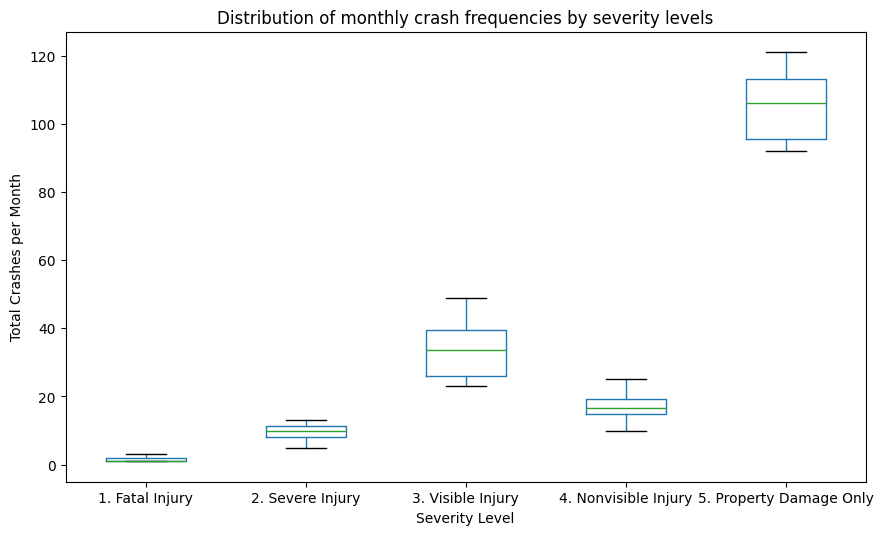

In [408]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))


# Create the boxplot
# here we use pandas boxplot function
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
monthly_counts.boxplot(ax = ax, by = "CRASH_SEVERITY")
plt.grid(None)

# Set labels and title
ax.set_xlabel('Severity Level')
ax.set_ylabel('Total Crashes per Month')
ax.set_title('Distribution of monthly crash frequencies by severity levels')
# The boxplot function automatically creates a subtitle that needs to be removed
fig.suptitle('')


# Static maps

We can create static maps using *GeoPandas* **plot()** function, which also utilizes *Matplotlib* library at the backend: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html

<Axes: >

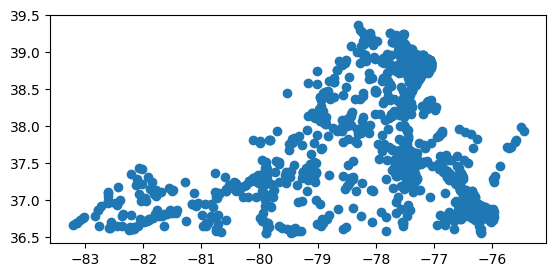

In [409]:
# let's just plot the crash data first
crash.plot()

We can **color the geometries by values in a column**. For example, we can color the crash locations by crash severity levels.

<Axes: >

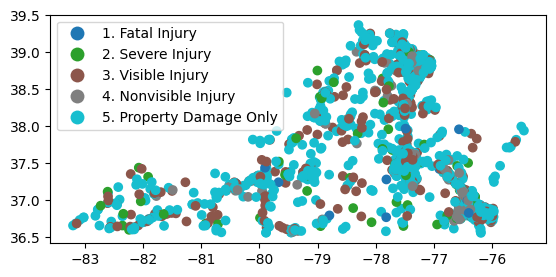

In [410]:
# crash locations colored by severity levels
# setting legends as True to show legends
crash.plot(column = 'CRASH_SEVERITY', legend = True)

We can use different color schemes to enhance visualizations. **Matplotlib offers a variety of built-in colormaps**: https://matplotlib.org/stable/users/explain/colors/colormaps.html

Depending on your data characteristics and visualization needs, you can choose from **sequential, diverging, or qualitative color schemes**. Alternatively, you can manually assign colors instead of using the built-in colormaps. However, manually setting colormaps is a more complex process and will not be covered in this lecture.

<Axes: >

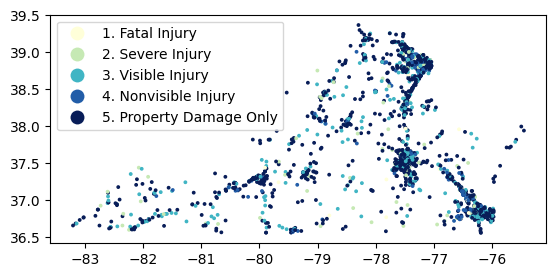

In [411]:
# Setting cmap (colormap) value as "YlGnBu"
# Given our data is ordinal (categorical but ordered), we are using a sequential color scheme
# also a reduced markersize will make the map look less noisy/crowded
crash.plot(column = 'CRASH_SEVERITY', legend = True, cmap = "YlGnBu", markersize = 3)

We also may want to reverse the color scheme to emphasize the fatal injuries with darker colors. You can add **_r** with the color scheme name to do so.

<Axes: >

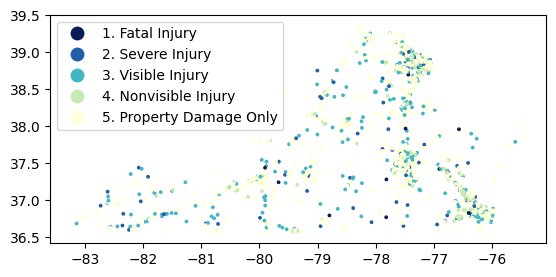

In [412]:
# notice how I used _r to reverse the color sequences
crash.plot(column = 'CRASH_SEVERITY', legend = True, cmap = "YlGnBu_r", markersize = 3)

Now let's add some additional background information to this map, such as **county boundaries and respective population size**.

<Axes: >

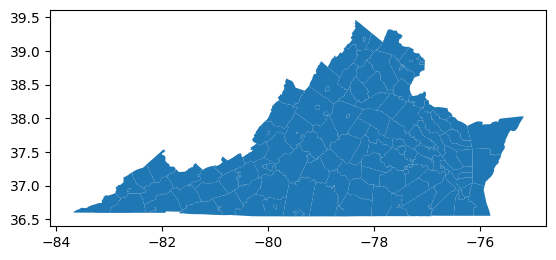

In [413]:
# Access shapefile of US counties from TigerLine Shapefiles
counties = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/COUNTY/tl_2022_us_county.zip")
va_counties = counties[counties['STATEFP'] == '51']
va_counties.plot()

In [414]:
# Accessing population data from US Census
# Remember that you need to install the library, everytime you reconnect to Colab server
!pip install census
# loading census library
from census import Census
# Set API key
c = Census("API_key")



In [415]:
# extract data
va_census = c.acs5.state_county(fields = ('NAME', "B01001_001E"), # B01001_001E: total population,
                                      state_fips = "51",          # 51 is FIPS code for Virginia
                                      county_fips = "*",          # * sign to extract all data for all County
                                      year = 2022)                # ACS 5-Year Survey for the year 2022
# convert data to dataframe
va_census = pd.DataFrame(va_census)
# rename the columns
va_census = va_census.rename(columns = {"B01001_001E": "Total_Population"})
va_census

,NAME,Total_Population,state,county
0,"Accomack County, Virginia",33367.0,51,001
1,"Albemarle County, Virginia",112513.0,51,003
2,"Alleghany County, Virginia",15159.0,51,005
3,"Amelia County, Virginia",13309.0,51,007
4,"Amherst County, Virginia",31426.0,51,009
...,...,...,...,...
128,"Suffolk city, Virginia",94856.0,51,800
129,"Virginia Beach city, Virginia",457900.0,51,810
130,"Waynesboro city, Virginia",22341.0,51,820
131,"Williamsburg city, Virginia",15486.0,51,830


<Axes: >

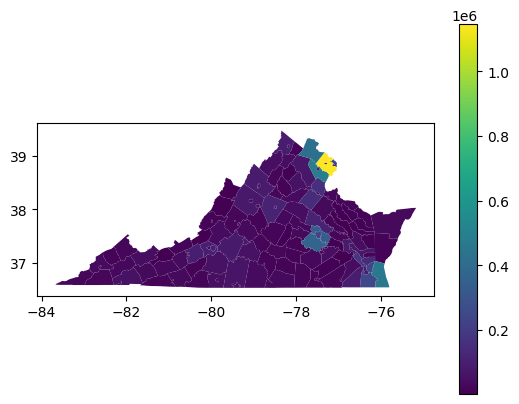

In [416]:
# Now we need to merge the county boundaries with the census population data
# we can use county FIPS code as common keys to merge
# using merge() function of pandas
va_dat = va_counties.merge(va_census, left_on = "COUNTYFP", right_on = "county")

# plotting the merged dataset
va_dat.plot(column = "Total_Population", legend = True)

<Axes: >

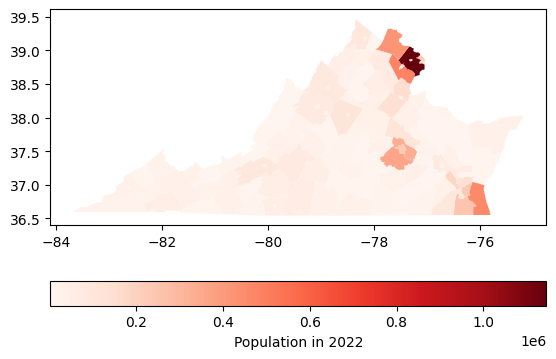

In [417]:
# say we want to modify the map legend
va_dat.plot(column = "Total_Population",
            cmap = 'Reds',
            legend = True,
            legend_kwds={'label': "Population in 2022", # adding a legend label
                         'orientation': "horizontal"}   # placing the legend horizontally
            )

### Putting it all together

**Now, to combine the crash data with the Virginia population map, we first need to check and match their coordinate reference systems (CRS).**

In [418]:
# putting it all together, first we need to make sure the CRS are right
print(va_dat.crs)
print(crash.crs)

# convert one into another
va_dat = va_dat.to_crs(crash.crs)

# print again to make sure that they match
print(va_dat.crs)
print(crash.crs)

EPSG:4269
EPSG:4326
EPSG:4326
EPSG:4326


Text(0.5, 1.0, 'Crash Severity in Virginia based on population size')

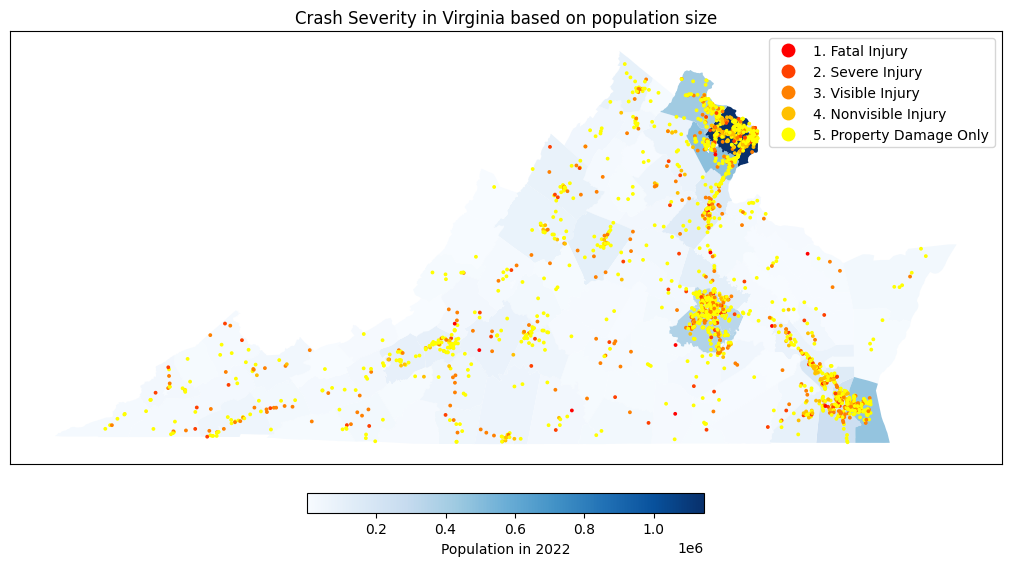

In [419]:
# Create the figure and axes first
fig, ax = plt.subplots(figsize=(10, 6),
                       layout = 'constrained')  # contrained layout helps to avoid unnecessary white space

# The polygon map layer will go beneath the point layer
# so, first we will plot the polygon layer
plot1 = va_dat.plot(ax = ax,                     # asking to plot the layer within the defined axes
                   column = "Total_Population",  # column values to be used for the color scheme
                   cmap = 'Blues',               # colormap to be used
                   legend = True,                # show legend
                   legend_kwds={'label': "Population in 2022", # legend label
                                'orientation': "horizontal",   # legend orientation
                                'shrink': 0.4})                # modify legend length and width

# next we add the crash layer to the same plot axes
crash.plot(ax=plot1,                   # asking to use plot1 as the axes
           column = 'CRASH_SEVERITY',  # column values to be used for the color scheme
           legend = True,              # Show legend
           cmap = "autumn",            # colormap to be used
           markersize = 3)             # markersize

# remove axes tick labels (lat-long labels)
ax.set_xticks([])
ax.set_yticks([])

# add a map title
ax.set_title('Crash Severity in Virginia based on population size')

 It is essential to add scale bar and north sign to geographic maps. You can use [matplotlib_scalebar](https://geopandas.org/en/stable/gallery/matplotlib_scalebar.html) library for the scale bar and the [geo_northarrow](https://github.com/pmdscully/geo_northarrow) library for the north arrow.

 You need to install and import the libraries first.



In [420]:
# Installing the matplotlib_scalebar library
!pip install matplotlib_scalebar
# importing the ScaleBar module
from matplotlib_scalebar.scalebar import ScaleBar

In [421]:
# Installing the geo_northarrow library
# This is also an example of installing libraries directly from GitHub
!pip install git+https://github.com/pmdscully/geo_northarrow.git
# importing the add_north_arrow function
from geo_northarrow import add_north_arrow


  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-ncy_kkhq
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-ncy_kkhq
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


The scale bar works best when we present the **data layer in projected coordiante system**, so that we can measure distance along the maps in linear units.

In [422]:
# Converting the data layers to EPSG 3857
va_dat = va_dat.to_crs(3857)
crash = crash.to_crs(3857)

Now we can create the updated map.


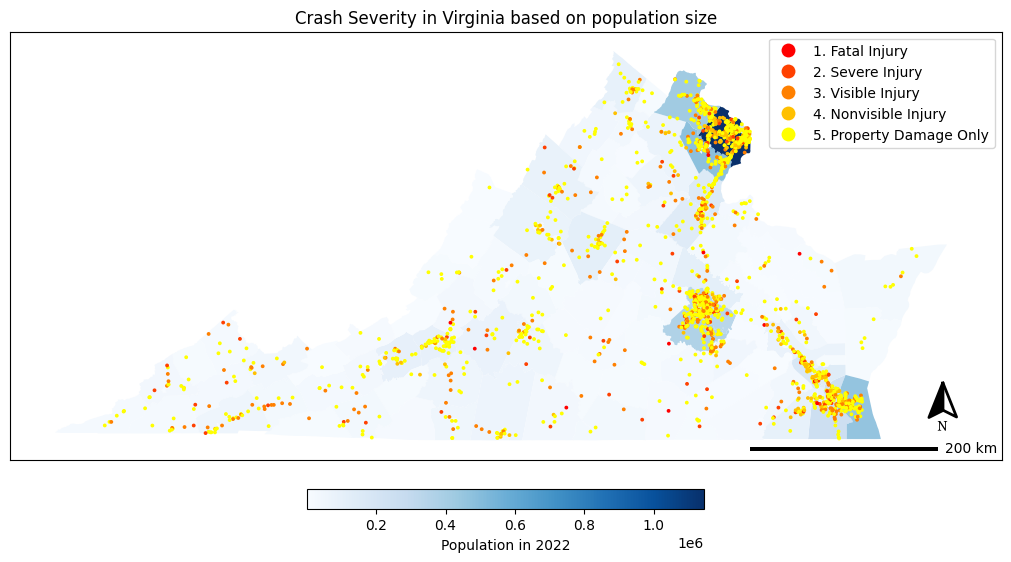

In [423]:
# Create the figure and axes first
fig, ax = plt.subplots(figsize=(10, 6),
                       layout = 'constrained')  # contrained layout helps to avoid unnecessary white space

# The polygon map layer will go beneath the point layer
# so, first we will plot the polygon layer
plot1= va_dat.plot(ax = ax,                     # asking to plot the layer within the defined axes
                   column = "Total_Population", # column values to be used for the color scheme
                   cmap = 'Blues',               # colormap to be used
                   legend = True,               # show legend
                   legend_kwds={'label': "Population in 2022", # legend label
                                'orientation': "horizontal",   # legend orientation
                                'shrink': 0.4})                # modify legend length and width

# next we add the crash layer to the same plot axes
crash.plot(ax=plot1,                   # asking to use plot1 as the axes
           column = 'CRASH_SEVERITY',  # column values to be used for the color scheme
           legend = True,              # Show legend
           cmap = "autumn",            # colormap to be used
           markersize = 3)             # markersize

# remove axes tick labels (lat-long labels)
ax.set_xticks([])
ax.set_yticks([])

# add a map title
ax.set_title('Crash Severity in Virginia based on population size')

# Adding a scale bar
scale1 = ScaleBar(
    dx=1,
    location="lower right",  # in relation to the whole plot
    scale_loc="right",       # in relation to the line
    box_alpha= 0.1           # Transparent box
)
ax.add_artist(scale1)

# Adding the north arrow
add_north_arrow(ax, scale=.45, xlim_pos=.95, ylim_pos=.1, color='#000', text_scaler=2, text_yT=-1.25)

You can use [.savefig()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) function to export the map as jpeg or png files.

In [424]:
# exporting plots
fig.savefig('map.png',             # image name
            dpi = 300,             # sets image resolution
            bbox_inches = 'tight', # avoids white space
            pad_inches = 0.3)      # white space padding to be added around image

# Interactive map

We can visualize interactive maps with [folium](https://python-visualization.github.io/folium/latest/) library. It acts as a bridge to **Leaflet**, a widely used open-source JavaScript library for web-based mapping. In the backend, Folium uses Leaflet functionalities and facilitate users to generate interactive maps in Python.

These interactive maps support zooming and panning, providing an engaging way to explore spatial data. The library enables customization with markers, layers, and popups, making it a powerful tool for visualizing geographic information.

Here are some example applications:
https://geopandas.org/en/stable/gallery/plotting_with_folium.html

In [425]:
# import the library first
import folium

In [426]:
# launch the interactive folium map for any specific area
map = folium.Map(location= [37.43, -78.66], # [lat, long] for virginia centroids
                 tiles="CartoDB Positron",  # alternate basemap options OpenStreetMap and Mapbox
                 zoom_start=9)              # initial zoom level
# display the map
map

Now, we want to add the **crash locations as markers (symbolized by severity levels)** to this map.

In [427]:
# the map only works with EPSG 4326, so we need a conversion again
crash = crash.to_crs(4326)
# Next, we are creating a list of locations [lat, long] from the crash geodataframe
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in crash.geometry]

# we can plot all the crash locations on the map, but it will make the folium map buggy and slow
# for demonstration purposes, I am only using the first 100 crash locations
geo_df_list1 = geo_df_list[0:100]
# this is how the list of locations look like
geo_df_list1

[[38.6538446810001, -77.280787312],
 [37.02773721599999, -76.3227895919999],
 [37.898547331, -76.362036174],
 [37.6955291560001, -77.45377980899998],
 [37.1036540900001, -79.94246394199999],
 [37.348710827999994, -77.35617320999998],
 [39.0100773620001, -77.42324316599999],
 [37.755435698, -77.855797092],
 [37.35301177400001, -77.40493621],
 [36.993474152, -81.95565776799998],
 [37.540595928000094, -77.64329832299998],
 [37.3864080180001, -79.46510664399989],
 [38.6736828900001, -77.24183640299998],
 [37.28721632900001, -77.48477042699989],
 [36.7748092190001, -76.006695254],
 [38.974487169, -77.305346135],
 [38.8340097020001, -77.43204931499999],
 [38.807486246000096, -77.0819164449999],
 [39.0192475260001, -77.384617694],
 [36.9147871440001, -76.26455860399989],
 [36.8435660710001, -76.12923044699988],
 [38.6866902690001, -77.22751573299999],
 [36.757387857, -76.5961293029999],
 [39.007275867000004, -78.332058791],
 [38.082289201, -78.473639614],
 [36.87111876699999, -82.771238089999

Now we will iterate through the list of locations and add them as markers to the folium map.

In [428]:
# Iterate through list and add a marker for each crash location, color-coded by its severity levels.
i = 0
for coordinates in geo_df_list1:
    # assign a color marker for the crash severity levels
    if crash.CRASH_SEVERITY[i] == "1. Fatal Injury":
        type_color = "darkred"
    elif crash.CRASH_SEVERITY[i] == "2. Severe Injury":
        type_color = "red"
    elif crash.CRASH_SEVERITY[i] == "3. Visible Injury":
        type_color = "orange"
    elif crash.CRASH_SEVERITY[i] == "4. Nonvisible Injury":
        type_color = "beige"
    else:
        type_color = "gray"

    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup="Date: "
            + str(crash.CRASH_DT1[i])
            + "<br>"
            + "Collision type: "
            + str(crash.COLLISION_TYPE[i]),
            icon=folium.Icon(color="%s" % type_color),
        )
    )
    i = i + 1

# display the map
map

Folium is widely used for visualizing heatmaps that highlight how intensity levels for any spatial events, such as crashes vary across space. For example, the heatmap below illustrates crash densities in Virginia. Areas shaded in red indicate higher crash concentrations, while lighter colors represent lower densities.

In [429]:
# for heatmaps, you'll require the plugin module
from folium import plugins

# reset the folium map to remove the markers we added in the previous example
map = folium.Map(location= [37.43, -78.66],
                 tiles="CartoDB Positron",
                 zoom_start=9)
# create the heat map (using all crash data) and add it to the folium map
plugins.HeatMap(geo_df_list).add_to(map)

# display the map
map